In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploration and Visualization of MPG Data

In [2]:
data = pd.read_csv("mpg.csv")

In [3]:
data.head(n=7) #first 7 lines

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [6]:
data.dtypes   # data types

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [7]:
#here we see the horsepower being object but we know that it contains numerc values lets inspect

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
data["horsepower"].mean()

TypeError: ignored

In [ ]:
data = data[data.horsepower != "?"]

In [ ]:
data.dtypes

In [10]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

ValueError: ignored

In [ ]:
data.dtypes    

In [11]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data.describe()     #to check the CMD and percentile

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
data.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.model_selection import train_test_split
df=data

In [16]:
df["acceleration"]= (df["acceleration"] - df["acceleration"].min())/(df["acceleration"].max()- df["acceleration"].min())
df["origin"]= (df["origin"] - df["origin"].min())/(df["origin"].max()- df["origin"].min())
df["model_year"]= (df["model_year"] - df["model_year"].min())/(df["model_year"].max()- df["model_year"].min())
df["horsepower"]= (df["horsepower"] - df["horsepower"].min())/(df["horsepower"].max()- df["horsepower"].min())
df["displacement"]= (df["displacement"] - df["displacement"].min())/(df["displacement"].max()- df["displacement"].min())

TypeError: ignored

In [17]:

#training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
training_features = [ 'origin','displacement','model_year']
target = 'mpg'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.11,  #0.1 to 0.2
                                                   random_state=88)  #random state 1 to 10000

In [18]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse',max_depth=3,min_samples_leaf=4,min_samples_split=5)


In [19]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 8.55
R Square score: 0.88


[Text(167.4, 190.26, 'X[1] <= 190.5\nmse = 59.616\nsamples = 354\nvalue = 23.502'),
 Text(83.7, 135.9, 'X[2] <= 0.708\nmse = 35.39\nsamples = 204\nvalue = 28.451'),
 Text(41.85, 81.53999999999999, 'X[1] <= 112.0\nmse = 22.446\nsamples = 115\nvalue = 25.67'),
 Text(20.925, 27.180000000000007, 'mse = 20.044\nsamples = 61\nvalue = 28.341'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 7.992\nsamples = 54\nvalue = 22.652'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 128.0\nmse = 29.194\nsamples = 89\nvalue = 32.046'),
 Text(104.625, 27.180000000000007, 'mse = 20.768\nsamples = 56\nvalue = 34.741'),
 Text(146.475, 27.180000000000007, 'mse = 10.253\nsamples = 33\nvalue = 27.473'),
 Text(251.10000000000002, 135.9, 'X[1] <= 284.5\nmse = 13.937\nsamples = 150\nvalue = 16.771'),
 Text(209.25, 81.53999999999999, 'X[2] <= 0.875\nmse = 9.119\nsamples = 64\nvalue = 19.586'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 3.696\nsamples = 59\nvalue = 19.208'),
 Text(230.175, 

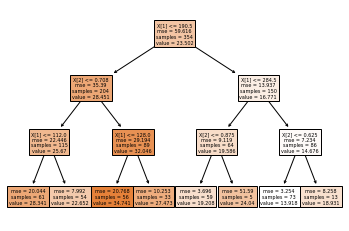

In [26]:
from sklearn.tree import plot_tree
plot_tree(model,filled=True)